In [4]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from iprocessor import add_day_name_column, add_date_name_column, smooth_sundays_rolling_w7_l

In [5]:
df = pd.read_csv(r'German_case_period_may_aug.csv')

In [8]:
#Convert 'Date' column to datetime format----------------------------------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Modification------------------------------------------------------------------------------
# Add the 'days' column
df = add_day_name_column(df)
df = add_date_name_column(df)
# second modification with w7_l-----------------------------------------------------------------------------
df_observed = smooth_sundays_rolling_w7_l(df)
df_observed.tail(5)

,Date,Confirmed,Deaths,Recovered,n_confirmed,n_death,n_recovered,Infection_case,date_name,days,rolling_mean_r,rolling_mean_c,rolling_mean_d
88,2020-07-28,210338,9412,200926,662.877551,4.734694,658.142857,563,Tuesday,89,658.142857,662.877551,4.734694
89,2020-07-29,211114,9418,201696,681.670068,4.959184,676.710884,919,Wednesday,90,676.710884,681.670068,4.959184
90,2020-07-30,211868,9423,202445,700.384354,5.155102,695.229252,940,Thursday,91,695.229252,700.384354,5.155102
91,2020-07-31,212712,9438,203274,709.067460,5.323810,703.743651,996,Friday,92,703.743651,709.067460,5.323810
92,2020-08-01,213410,9439,203971,718.680952,5.560000,713.120952,1066,Saturday,93,713.120952,718.680952,5.560000


In [24]:
# the daily: confirmed, dead, recovered
C_daily = np.array(df_observed['n_confirmed'])
D_daily = np.array(df_observed['n_death'])
R_daily = np.array(df_observed['n_recovered'])
#
# comulative confirmed, dead, recovered
C_cm = np.array(df_observed['Confirmed'])
D_cm = np.array(df_observed['Deaths'])
R_cm = np.array(df_observed['Recovered'])
# time
t = np.array(df_observed['days'])
t_date = df_observed['Date']

C:\Users\Evenezer kidane\AppData\Local\Temp\ipykernel_56448\4258594190.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


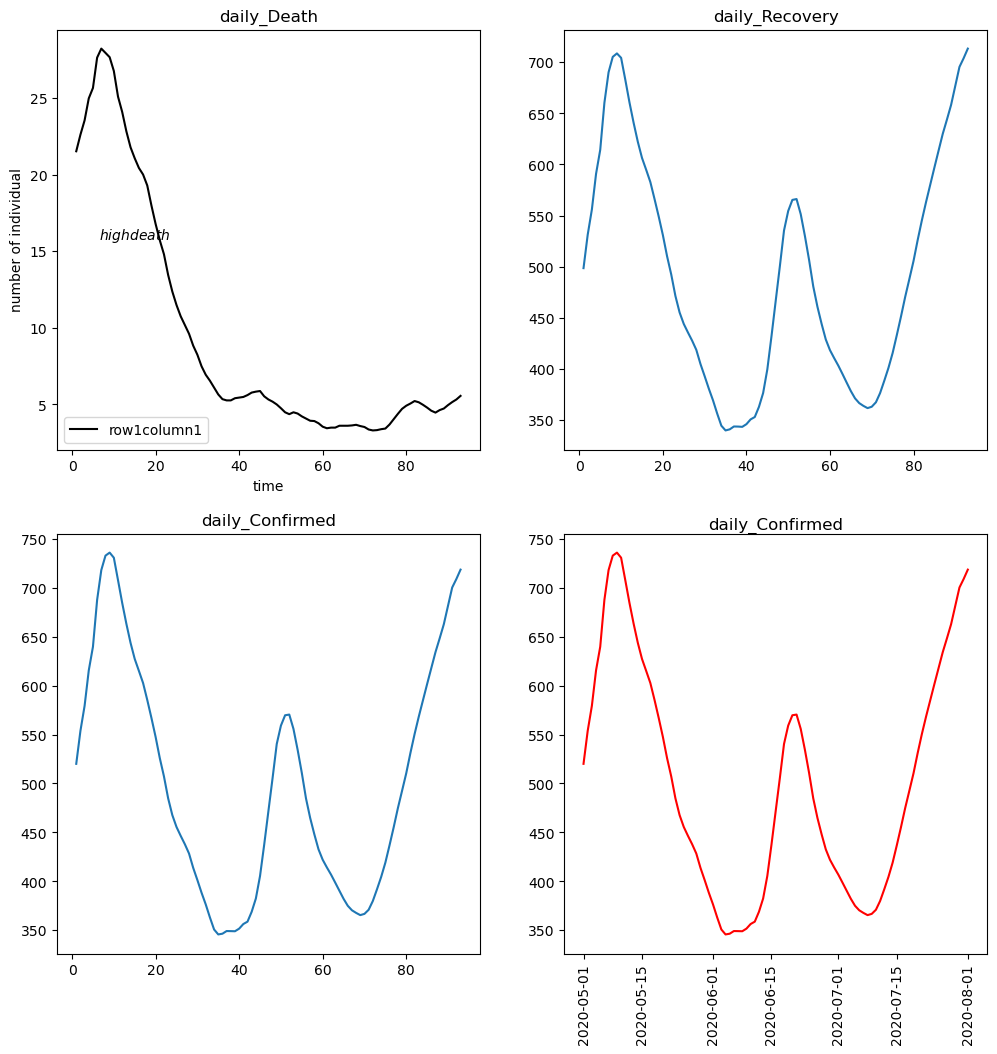

In [25]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

ax = axes[0][0]
ax.plot(t,D_daily,'-',label='row1column1', color='black')
ax.set_xlabel('time')
ax.set_ylabel('number of individual')
ax.text(0.1,0.5,'$high death$',transform=ax.transAxes)# putting in text
ax.tick_params(axis='both',labelsize=10)# messing with size of tick
ax.legend(loc='lower left', fontsize=10, frameon=True)
ax.set_title('daily_Death')
#
ax = axes[0][1]
ax.plot(t,R_daily,'-',label='row2column1')
ax.set_title('daily_Recovery')
#
ax = axes[1][0]
ax.plot(t,C_daily,'-',label='row1column2')
ax.set_title('daily_Confirmed')
#
ax = axes[1][1]
ax.plot(t_date,C_daily,'-',label='row1column2', color = 'red')
ax.set_title('daily_Confirmed',transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

C:\Users\Evenezer kidane\AppData\Local\Temp\ipykernel_56448\1625617984.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


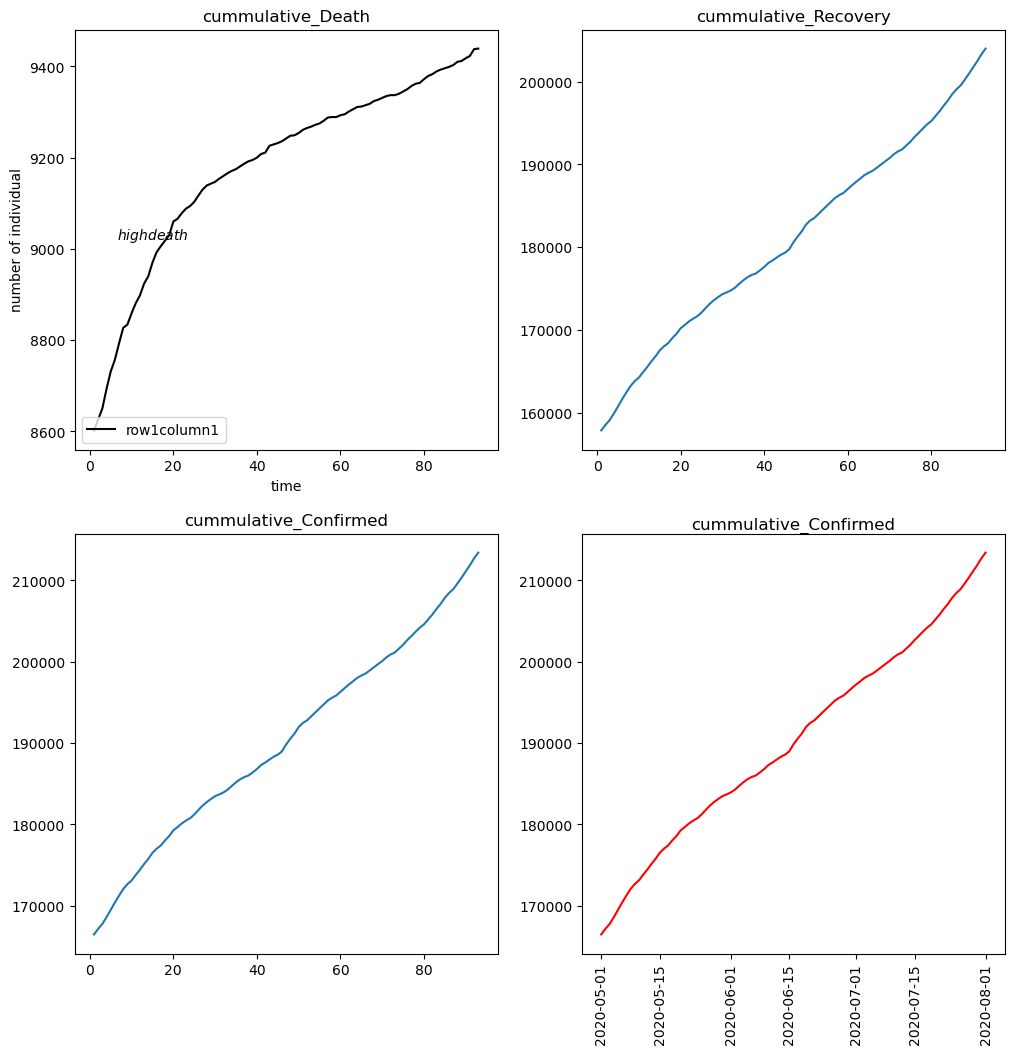

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

ax = axes[0][0]
ax.plot(t,D_cm,'-',label='row1column1', color='black')
ax.set_xlabel('time')
ax.set_ylabel('number of individual')
ax.text(0.1,0.5,'$high death$',transform=ax.transAxes)# putting in text
ax.tick_params(axis='both',labelsize=10)# messing with size of tick
ax.legend(loc='lower left', fontsize=10, frameon=True)
ax.set_title('cummulative_Death')
#
ax = axes[0][1]
ax.plot(t,R_cm,'-',label='row2column1')
ax.set_title('cummulative_Recovery')
#
ax = axes[1][0]
ax.plot(t,C_cm,'-',label='row1column2')
ax.set_title('cummulative_Confirmed')
#
ax = axes[1][1]
ax.plot(t_date,C_cm,'-',label='row1column2', color = 'red')
ax.set_title('cummulative_Confirmed',transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# nach der solve_ivp?